1. The Dataset was successfully Downloaded

Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection  import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

2.Load the dataset 

In [2]:
data = pd.read_csv(r"C:\Users\user\Downloads\abalone1.csv")

In [3]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


3. Perform Below Visualizations

3.1Univariate Analysis 

<AxesSubplot:ylabel='Frequency'>

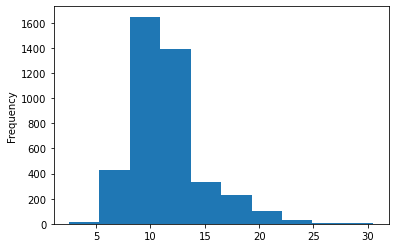

In [4]:
#Histogram
data['Age'].plot(kind='hist')

{'whiskers': [<matplotlib.lines.Line2D at 0x22e7a16d550>,
 'caps': [<matplotlib.lines.Line2D at 0x22e7a16dbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e7a16d280>],
 'medians': [<matplotlib.lines.Line2D at 0x22e7a17b0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e7a17b3a0>],
 'means': []}

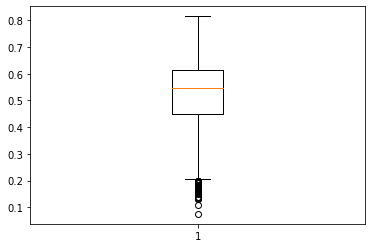

In [5]:
#Boxplot
plt.boxplot(data['Length'])

<BarContainer object of 4177 artists>

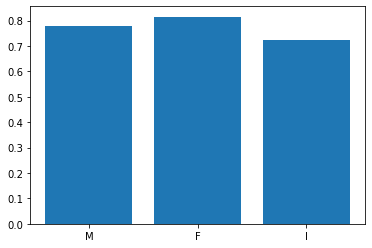

In [6]:
#Bar chart
df = pd.DataFrame(data)
X = list(df.iloc[:,0])
Y = list(df.iloc[:,1])
plt.bar(X,Y)

3.2 Bivariate Analysis

<BarContainer object of 4177 artists>

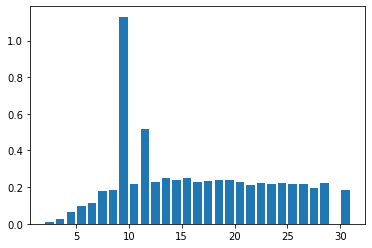

In [7]:
#Stacked Bar Chart
plt.bar(data['Age'],data['Height'])

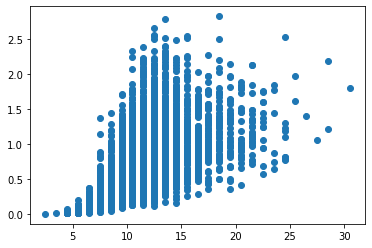

In [8]:
#Scatter plot
plt.scatter(data['Age'],data['Whole weight'])

3.3 Multivatiate Analysis

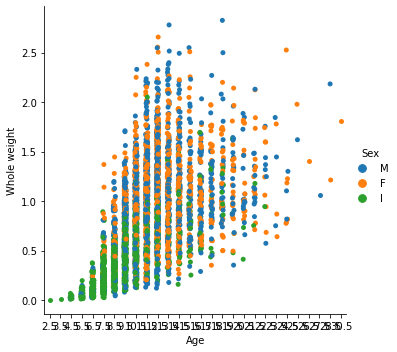

In [9]:
sns.catplot(data=data,x='Age',y='Whole weight',hue='Sex')

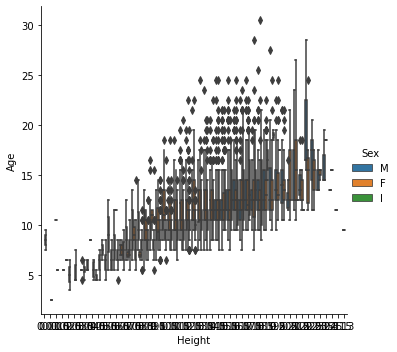

In [10]:
#Box Plot
sns.catplot(data=data,x='Height',y='Age',hue='Sex',kind='box')

4. Perform descriptive statistics on the dataset. 

In [16]:
data.mean()

C:\Users\user\AppData\Local\Temp\ipykernel_6272\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


Length             0.523992
Diameter           0.407881
Height             0.139516
Whole weight       0.828742
Shucked weight     0.359367
Viscera weight     0.180594
Shell weight       0.238831
Rings              9.933684
Age               11.433684
dtype: float64

In [17]:
data.median()

C:\Users\user\AppData\Local\Temp\ipykernel_6272\4184645713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


Length             0.5450
Diameter           0.4250
Height             0.1400
Whole weight       0.7995
Shucked weight     0.3360
Viscera weight     0.1710
Shell weight       0.2340
Rings              9.0000
Age               10.5000
dtype: float64

In [18]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


In [19]:
data.shape

(4177, 10)

5. Check for Missing values and deal with them. 

In [20]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

6. Find the outliers and replace them outliers 

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

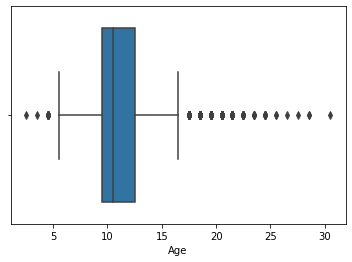

In [21]:
sns.boxplot(data['Age'])

In [22]:
qnt = data.quantile(q=[0.25,0.75])
qnt

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,8.0,9.5
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,11.0,12.5


In [23]:
IQR = qnt.loc[0.75] - qnt.loc[0.25]
IQR

Length            0.1650
Diameter          0.1300
Height            0.0500
Whole weight      0.7115
Shucked weight    0.3160
Viscera weight    0.1595
Shell weight      0.1990
Rings             3.0000
Age               3.0000
dtype: float64

In [24]:
upper_extreme = qnt.loc[0.75]+1.5*IQR
upper_extreme

Length             0.86250
Diameter           0.67500
Height             0.24000
Whole weight       2.22025
Shucked weight     0.97600
Viscera weight     0.49225
Shell weight       0.62750
Rings             15.50000
Age               17.00000
dtype: float64

In [25]:
lower_extreme = qnt.loc[0.25]-1.5*IQR
lower_extreme

Length            0.20250
Diameter          0.15500
Height            0.04000
Whole weight     -0.62575
Shucked weight   -0.28800
Viscera weight   -0.14575
Shell weight     -0.16850
Rings             3.50000
Age               5.00000
dtype: float64

In [26]:
df2 = data[(data['Age']<upper_extreme['Age']) & (data['Age']>lower_extreme['Age'])]
df.shape

(4177, 10)

In [27]:
df2.shape

(3899, 10)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

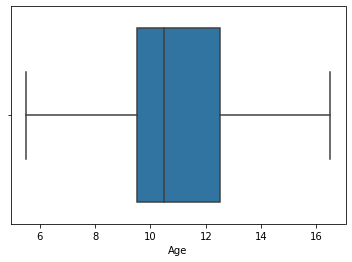

In [28]:
sns.boxplot(df2['Age'])

7. Check for Categorical columns and perform encoding

In [29]:
le = LabelEncoder()
df2['Sex'] = le.fit_transform(df2['Sex'])
df2['Age'] = le.fit_transform(df2['Age'])
df2.head()

C:\Users\user\AppData\Local\Temp\ipykernel_6272\1784642364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Sex'] = le.fit_transform(df2['Sex'])
C:\Users\user\AppData\Local\Temp\ipykernel_6272\1784642364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age'] = le.fit_transform(df2['Age'])


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,11
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,3
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,6
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,3


. 8. Split the data into dependent and independent variables

In [30]:
x = df.iloc[:,:-1].values
x

array([['M', 0.455, 0.365, ..., 0.101, 0.15, 15],
       ['M', 0.35, 0.265, ..., 0.0485, 0.07, 7],
       ['F', 0.53, 0.42, ..., 0.1415, 0.21, 9],
       ...,
       ['M', 0.6, 0.475, ..., 0.2875, 0.308, 9],
       ['F', 0.625, 0.485, ..., 0.261, 0.296, 10],
       ['M', 0.71, 0.555, ..., 0.3765, 0.495, 12]], dtype=object)

In [31]:
y = df.iloc[:,-1].values
y

array([16.5,  8.5, 10.5, ..., 10.5, 11.5, 13.5])

9. Scale the independent variables 

In [32]:
scaler = MinMaxScaler()
df[['Age']] = scaler.fit_transform(df[['Age']])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0.500000
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0.214286
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0.285714
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0.321429
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0.214286
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0.357143
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0.321429
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0.285714
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0.321429


10. Split the data into training and testing 

In [33]:
x = data.drop('Rings', axis = 1)
y = data['Whole weight']

In [34]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0.500000
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0.214286
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0.285714
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0.321429
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0.214286
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0.357143
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0.321429
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0.285714
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0.321429


In [35]:
y

0       0.5140
1       0.2255
2       0.6770
3       0.5160
4       0.2050
         ...  
4172    0.8870
4173    0.9660
4174    1.1760
4175    1.0945
4176    1.9485
Name: Whole weight, Length: 4177, dtype: float64

In [36]:
train_size=0.05
X = df.drop(columns=['Sex']).copy()
Y = df['Age']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.1)
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
2486   0.490     0.400   0.145        0.6635          0.2100          0.1295   
317    0.450     0.350   0.100        0.3675          0.1465          0.1015   
2555   0.370     0.290   0.080        0.2545          0.1080          0.0565   
2987   0.555     0.405   0.190        1.4060          0.6115          0.3420   
1206   0.750     0.570   0.210        2.2360          1.1090          0.5195   
...      ...       ...     ...           ...             ...             ...   
1685   0.620     0.450   0.135        0.9240          0.3580          0.2265   
2049   0.445     0.320   0.120        0.3780          0.1520          0.0825   
1146   0.580     0.445   0.135        0.8140          0.3775          0.1915   
3518   0.710     0.570   0.195        1.3480          0.8985          0.4435   
1414   0.685     0.545   0.205        1.7925          0.8145          0.4160   

      Shell weight  Rings       Age  
2

11. Build the Model

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

12. Train the Model 

In [38]:
lr.fit(X_train,Y_train)

LinearRegression()

13. Test the Model

In [39]:
pred = lr.predict(X_train)

In [40]:
pred

array([0.42857143, 0.32142857, 0.17857143, 0.32142857, 0.35714286,
       0.39285714, 0.17857143, 0.21428571, 0.17857143, 0.25      ,
       0.67857143, 0.10714286, 0.28571429, 0.35714286, 0.32142857,
       0.32142857, 0.07142857, 0.46428571, 0.42857143, 0.25      ,
       0.28571429, 0.39285714, 0.25      , 0.35714286, 0.5       ,
       0.25      , 0.42857143, 0.28571429, 0.28571429, 0.17857143,
       0.25      , 0.35714286, 0.64285714, 0.42857143, 0.21428571,
       0.28571429, 0.35714286, 0.21428571, 0.17857143, 0.5       ,
       0.35714286, 0.42857143, 0.35714286, 0.14285714, 0.25      ,
       0.28571429, 0.10714286, 0.25      , 0.39285714, 0.35714286,
       0.39285714, 0.17857143, 0.25      , 0.21428571, 0.28571429,
       0.35714286, 0.32142857, 0.28571429, 0.14285714, 0.10714286,
       0.39285714, 0.35714286, 0.21428571, 0.25      , 0.60714286,
       0.25      , 0.28571429, 0.32142857, 0.28571429, 0.75      ,
       0.28571429, 0.42857143, 0.32142857, 0.28571429, 0.32142

14. Measure the performance using Metrics.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(pred, Y_test)